## 1. Data

### 1.1 Introduction to Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data

### 1.2 Goal of the Project

* Understand the Dataset 
* Perform Preprocessing on Data
* perfrom exploratory analysis. 
* Dataset exploration using various types of data visualization. 
* Describe Insights from the data
* Discussion on Modeling

## 2. Import 

### 2.1 Import Libraries
that will be used in the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os

warnings.filterwarnings('ignore')

### 2.2 Reading Data Set
reading both train and test dataset. 

In [2]:
train_df = pd.read_csv('train.csv')
test_df_actual = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Preparation

### 3.1 Basic Analysis

In [4]:
#make a copy of test data we'll use the actual at the end
test_df= test_df_actual.copy()

In [5]:
# how many columns and rows are in the train data
print(f"There are {train_df.shape[0]} number of rows and {train_df.shape[1]} number of columns.")

There are 891 number of rows and 12 number of columns.


In [6]:
# name of columns
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# data type of each column
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# info about columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* From the above observation we can see there are some null values in few columns.
* Let see how many exact null values in which columns

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Numerical data Statistic Summary

In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Categorical Data Statistic Summary

In [12]:
train_df.describe(include = 'O').T

,count,unique,top,freq
Name,891,891,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### 3.2 Data Cleaning and preprocessing 

* From the above observation we can see that we have total 891 number of rows 
* In the age column we have 177 null values and in the embarked column we have 2 null values.
* But in cabin we have 687 null values.

* We can remove missing values by filling the age with the mean of age columns from both train and test data
* And Embarked column with the mode of embarked column in the train data
* But it's not a good idea to fill a column with mean or mode which has more then 80 % null values. 
* So we'll remove cabin column from both train and test data

#### Handling Null Values

In [13]:
# fill age with mean of age columns and convert the datatype into integer
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [14]:
#fill fare of test value with mean of fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [15]:
# fill Embarked with mode of Embarked columns
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

#### Dropping column
* Dropping Cabin Column because it's having alot of null values.

In [13]:
# remove cabin column and 
train_df.drop(['Cabin'], axis = 1, inplace = True)
test_df.drop(['Cabin'], axis = 1, inplace = True)

* Also remove passanger id, Name and Ticker because these are not gonna help us in exploration and prediction
* Since Name, Ticket, and PassengerId contains unique data, these columns will be removed.

In [14]:
train_df.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
test_df.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [15]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
#check if there is any duplicate value
train_df[train_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


* There are 111 rows duplicated, Let's remove it

In [27]:
train_df = train_df.drop_duplicates()

* let's see if duplicated have dropped?

In [28]:
train_df[train_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


* No duplicate found

In [29]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Indexing 

* Now if we look at the index column we can see the number of records are 780 but, last index is 890. So we need to apply indexing on the dataframe

In [30]:
train_df.reset_index(drop = True, inplace = True)

In [31]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
775,0,3,female,39.0,0,5,29.1250,Q
776,1,1,female,19.0,0,0,30.0000,S
777,0,3,female,NaN,1,2,23.4500,S
778,1,1,male,26.0,0,0,30.0000,C


#### Merge both dataframe excluding Survived column for some analysis

In [33]:
merged_df = pd.concat([train_df, test_df], axis = 0)
merged_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,NaN,3,male,NaN,0,0,8.0500,S
414,NaN,1,female,39.0,0,0,108.9000,C
415,NaN,3,male,38.5,0,0,7.2500,S
416,NaN,3,male,NaN,0,0,8.0500,S


In [34]:
# reset_index
merged_df.reset_index(drop = True, inplace = True)
#drop survived column
merged_df.drop('Survived', axis = 1, inplace = True)
merged_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1193,3,male,NaN,0,0,8.0500,S
1194,1,female,39.0,0,0,108.9000,C
1195,3,male,38.5,0,0,7.2500,S
1196,3,male,NaN,0,0,8.0500,S


## 4. Analysis Visualization Insights

#### 4.1 Survived Distribution

In [44]:
train_df.Survived.value_counts()

0    458
1    322
Name: Survived, dtype: int64

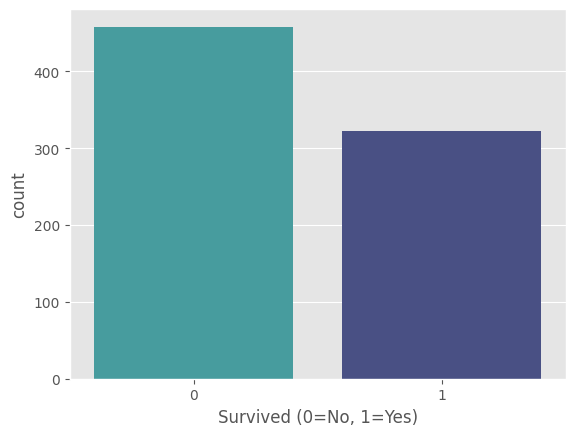

In [45]:
sns.countplot(x="Survived", data=train_df, palette="mako_r")
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

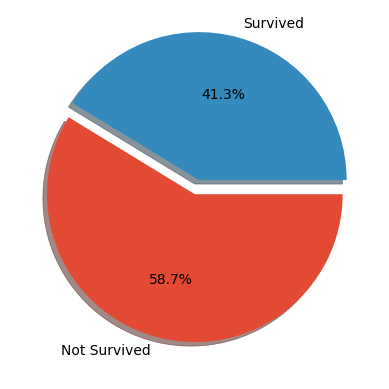

In [46]:
plt.pie(train_df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], counterclock=False, shadow=True, 
        explode=[0,0.1], autopct='%1.1f%%', radius=1)
plt.show()

It can be seen that most passengers are not survived.

#### 4.2 Gender Distribution

In [47]:
merged_df.Sex.value_counts()

male      754
female    444
Name: Sex, dtype: int64

In [48]:
merged_df.Sex.value_counts(normalize = True)*100

male      62.93823
female    37.06177
Name: Sex, dtype: float64

* Female Percentage: 37%
* Male Percentage: 62%

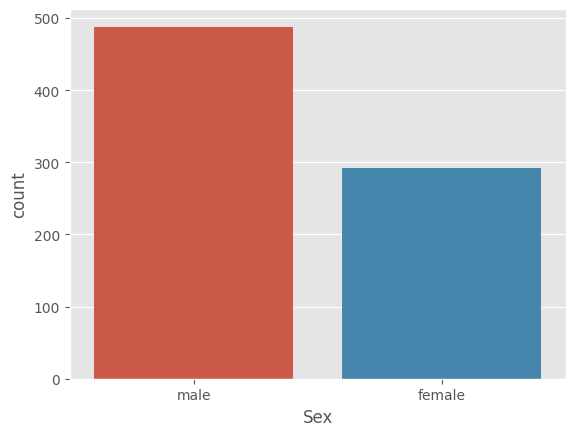

In [49]:
sns.countplot(x='Sex', data=train_df)
plt.xlabel("Sex")
plt.show()

* The percentage of male passengers is higher than female passengers.

#### 4.3 Age Distribution

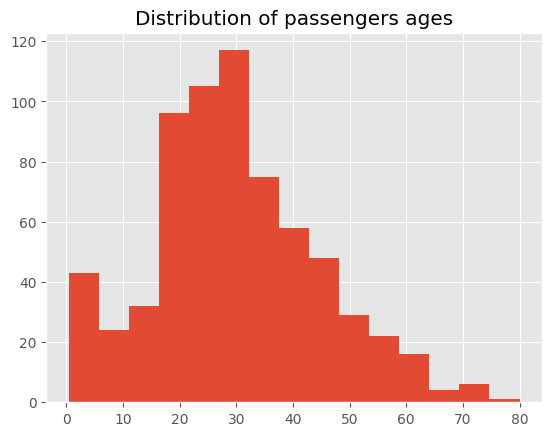

In [41]:
plt.hist(train_df['Age'], bins=15);
plt.title('Distribution of passengers ages')
plt.show()

* The average age is approximately 30
* maximum age is near 80
* And minimum is 0.42 years old. it means may be some are kids and having age less than year.

#### 4.4 Survived Distribution based on Gender

##### grouping

In [50]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            76
        1           216
male    0           382
        1           106
Name: Survived, dtype: int64

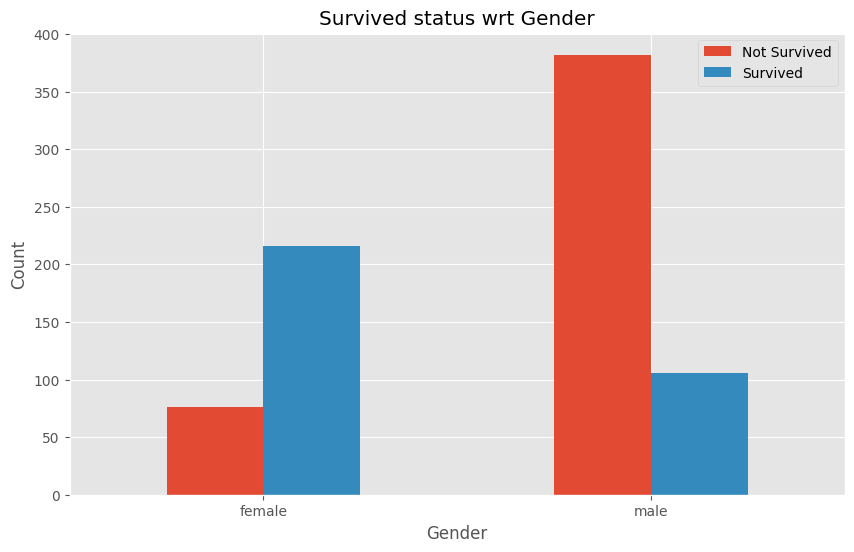

In [51]:
pd.crosstab(train_df.Sex,train_df.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status wrt Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Count')
plt.show()


In [59]:
# Grouping by 'Sex' and 'Survived' columns and calculating the counts
grouped = train_df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Calculating survival ratio
total_count = train_df.shape[0]
survival_ratio = grouped['Count'] / total_count

# Calculating percentage of male and female survivors
male_survived_percent = survival_ratio[(grouped['Sex'] == 'male') & (grouped['Survived'] == 1)] * 100
female_survived_percent = survival_ratio[(grouped['Sex'] == 'female') & (grouped['Survived'] == 1)] * 100

# Printing the percentage of male and female survivors
print(f"Percentage of males who survived: {round(male_survived_percent.values[0])}%")
print(f"Percentage of females who survived: {round(female_survived_percent.values[0])}%")

Percentage of males who survived: 14%
Percentage of females who survived: 28%



* The number of female passengers that are survived is higher than male not survived.


#### 4.5 Survived Distribution based on Age

* Let's create the age group to better understand this part.

In [61]:
train_df['age_group'] = pd.qcut(train_df['Age'], q=10, precision = 0, duplicates = 'drop')

In [62]:
train_df['age_group'].value_counts()

(12.0, 19.0]    90
(28.0, 32.0]    78
(-1.0, 12.0]    68
(32.0, 36.0]    68
(36.0, 42.0]    65
(22.0, 25.0]    64
(42.0, 50.0]    63
(50.0, 80.0]    63
(19.0, 22.0]    61
(25.0, 28.0]    56
Name: age_group, dtype: int64

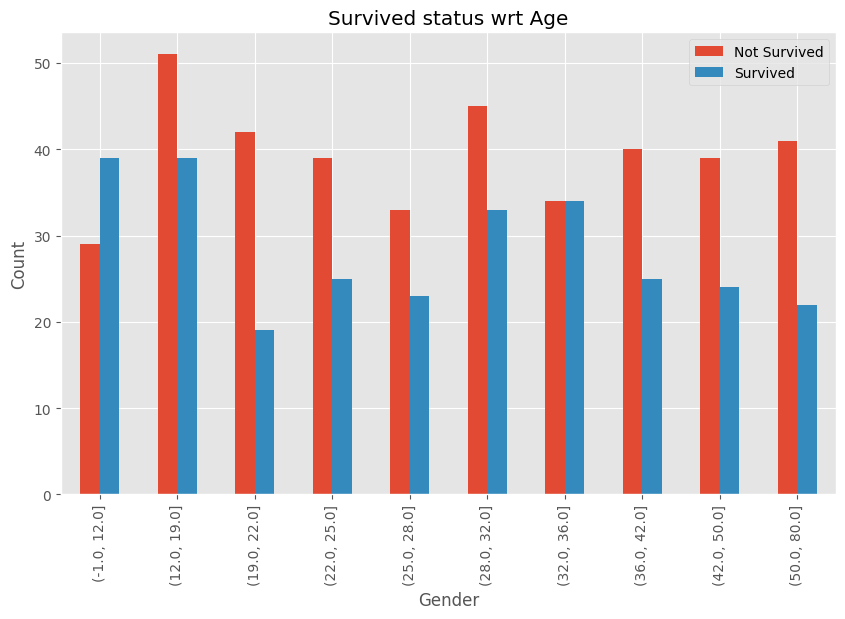

In [65]:
pd.crosstab(train_df.age_group,train_df.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status wrt Age')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Count')
plt.show()

* It can be seen that the majority of not survived passengers are between 16-30 y.o, quite similar to survived passengers in the same age range
* Mostly survived is between 0 to 16 years old

#### 4.6 Passenger Class based on Gender

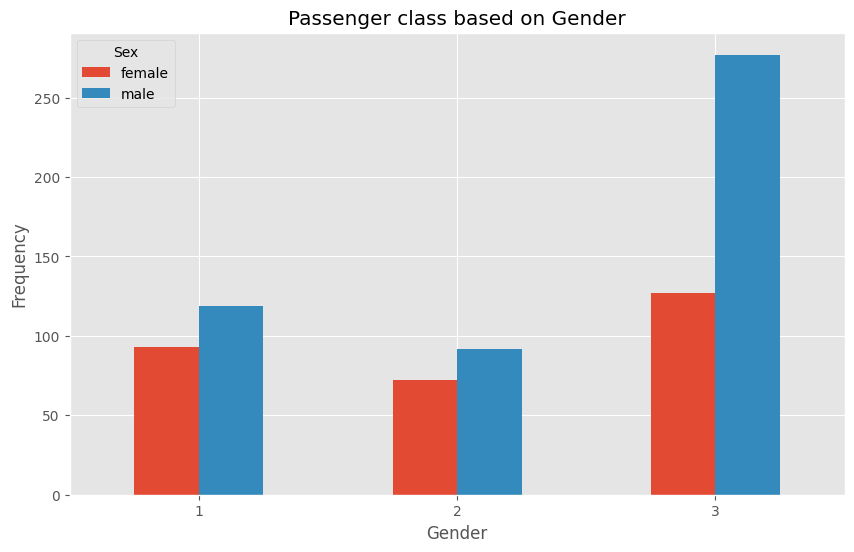

In [66]:
pd.crosstab(train_df.Pclass,train_df.Sex).plot(kind="bar",figsize=(10,6))
plt.title('Passenger class based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

* Most of passengers from both genders prefer to choose 3rd class rather than other classes.

#### 4.7 Survived Distribution based Port of Embarkation

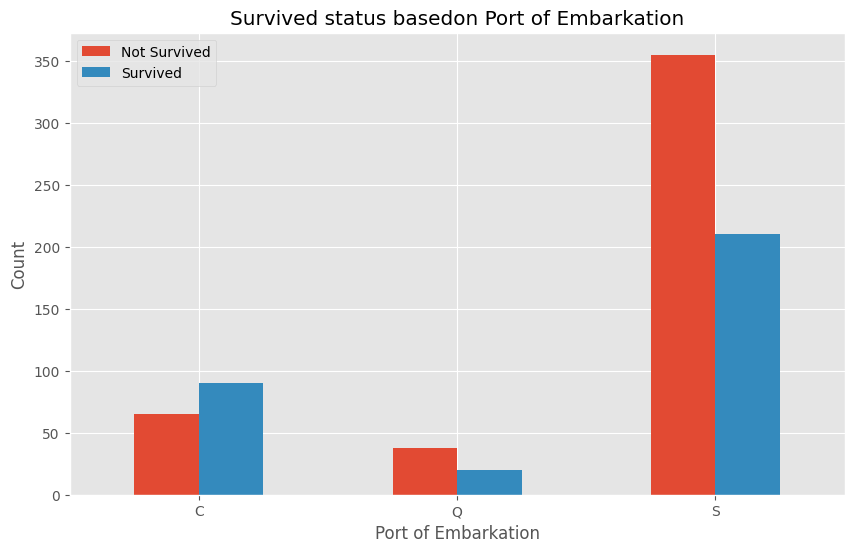

In [68]:
pd.crosstab(train_df.Embarked,train_df.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status basedon Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Count')
plt.show()

* C = Cherbourg, Q = Queenstown, S = Southampton
* Mosly survived and died people on Southampton port

#### 4.8 Distribution of Numerical Value

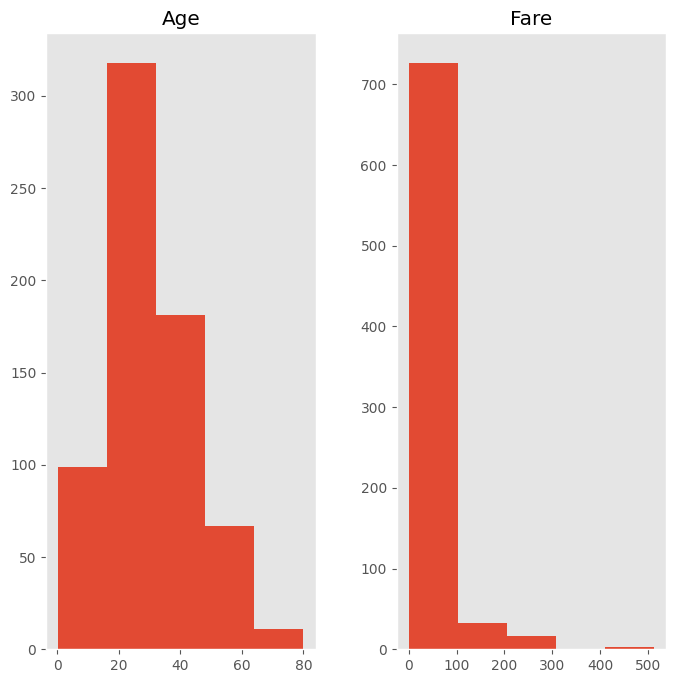

In [69]:
train_df[['Age', 'Fare']].hist(grid=False, figsize=(8, 8), bins=5)
plt.show()

#### 7.9 Correlation 

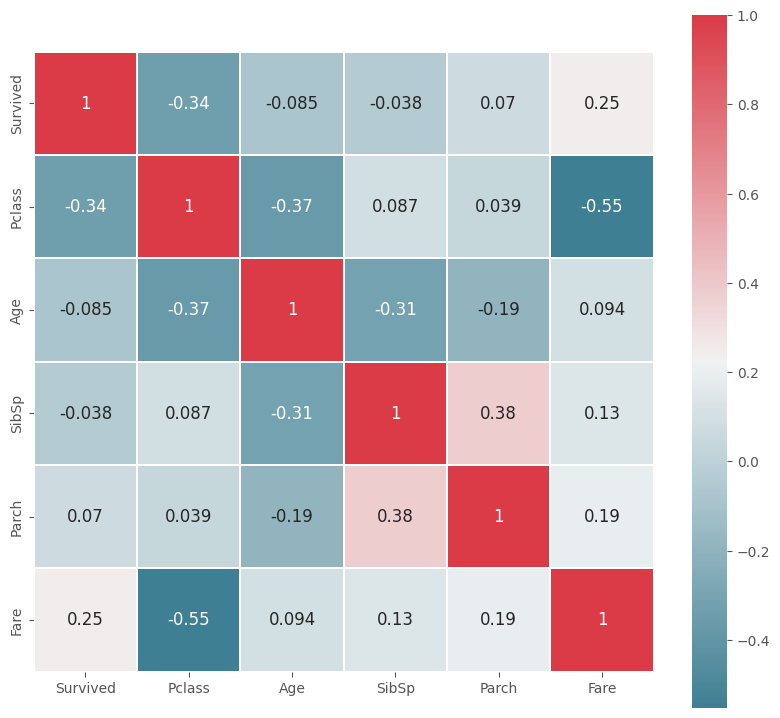

In [70]:
 _ , ax = plt.subplots(figsize =(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(
        train_df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 },
        ax= ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

## 5 Insights

* It can be seen that most passengers are not survived.
* The percentage of Male passanger is higher than Female
* The average age is approximately 30.The Oldest passanger is near 80 years old and minimum is 0.42 years old. it means may be some are kids and having age less than year.
* The number of female passengers that are survived is higher than male not survived.Male Survival Rate is 13% while female survival rate is 28%.
* The majority of not survived passengers are between 16-30 y.o, quite similar to survived passengers in the same age range. And mostly survived is between 0 to 16 years old
* Most of passengers from both genders prefer to choose 3rd class rather than other classes And majority of the passangers were in Southampton Port.

## 6 Machine Learning

The data seems imbalanced , 
* Since the number of not survived passengers is more than survived passengers, oversampling is carried out to avoid overfitting.
* The number of Not survived passangers are more than survived. So there is a chance that model will show the biasness.
* That's why we are gonna handle imbalance data.
we also need to perform one-hot-encoding to convert categorical variables to numerical variables. 
We need to split the data into train and test mode. which is already separate in our case.

Our target variable is **Survived**. So the problem in our case is classification problem. We Can use the following machine learning models for classification problem

The machine learning models used in this project are:

* Logistic Regression
* SVC
* K Neighbors Classifier
* Decision Tree
* Random Forest
* Gradient Boosting
